In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [3]:
%matplotlib inline

In [4]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [6]:
state_pop = pd.read_csv("maps/nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769


<AxesSubplot:>

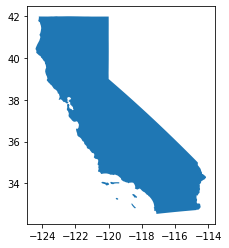

In [7]:
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()
pop_states[pop_states.NAME=="California"].plot()

<AxesSubplot:>

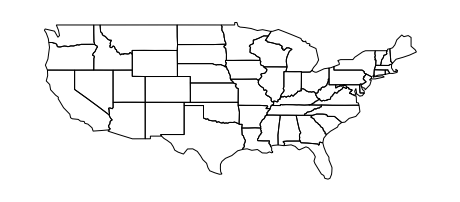

In [8]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)
gplt.polyplot(contiguous_usa)

<AxesSubplot:>

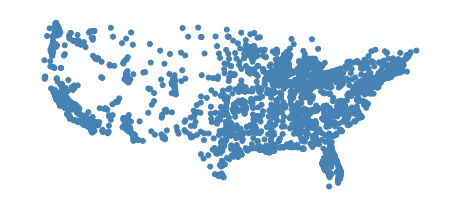

In [9]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

<AxesSubplot:>

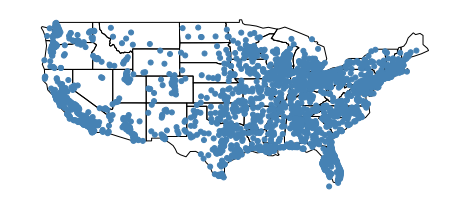

In [10]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

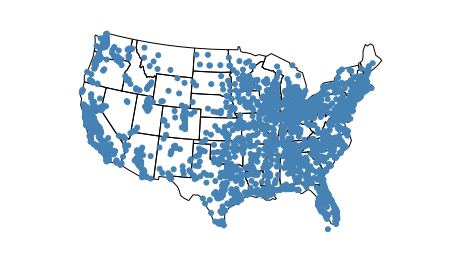

In [11]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

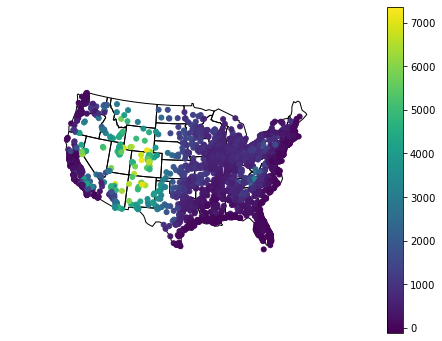

In [12]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
  continental_usa_cities,
  ax=ax,
  hue="ELEV_IN_FT",
  legend=True
)

Text(0.5, 1.0, 'Cities in the continental US, by elevation')

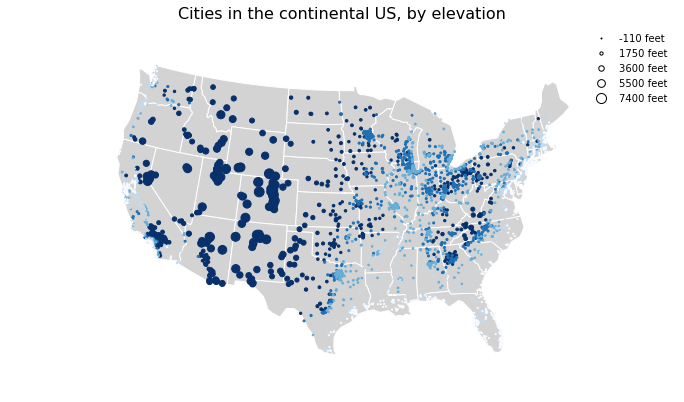

In [13]:
ax = gplt.polyplot(
  contiguous_usa,
  edgecolor="white",
  facecolor="lightgray",
  figsize=(12, 8),
  projection=gcrs.AlbersEqualArea()
)

gplt.pointplot(
  continental_usa_cities,
  ax=ax,
  hue="ELEV_IN_FT",
  cmap="Blues",
  scheme="quantiles",
  scale="ELEV_IN_FT",
  limits=(1, 10),
  legend=True,
  legend_var="scale",
  legend_kwargs={"frameon": False},
  legend_values=[-110, 1750, 3600, 5500, 7400],
  legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Cities in the continental US, by elevation", fontsize=16)

<GeoAxesSubplot:>

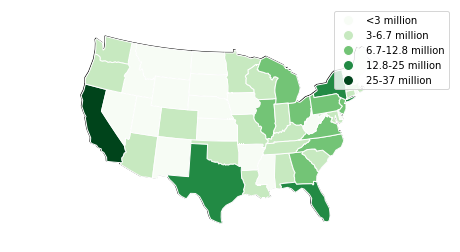

In [14]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  contiguous_usa,
  hue="population",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  scheme="FisherJenks",
  legend_labels=[
    "<3 million", "3-6.7 million", "6.7-12.8 million",
    "12.8-25 million", "25-37 million"
  ],
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

<GeoAxesSubplot:>

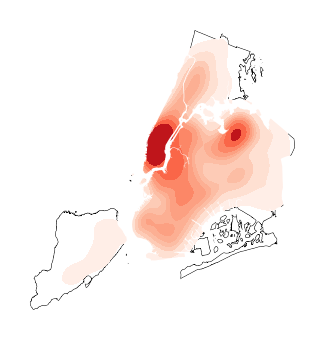

In [15]:
boroughs = gpd.read_file(gplt.datasets.get_path("nyc_boroughs"))
collisions = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))
ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
gplt.kdeplot(collisions, cmap="Reds", shade=True, clip=boroughs, ax=ax)

<GeoAxesSubplot:>

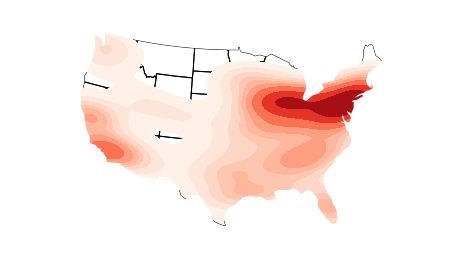

In [16]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.kdeplot(
  continental_usa_cities, 
  cmap="Reds", 
  shade=True, 
  clip=contiguous_usa, 
  ax=ax
)

In [17]:
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep="\t")
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [18]:
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


<GeoAxesSubplot:>

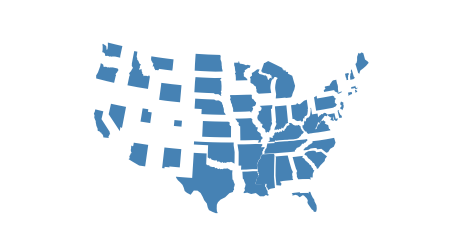

In [19]:
gplt.cartogram(
  geo_obesity,
  scale="Percent",
  projection=gcrs.AlbersEqualArea()
)

<GeoAxesSubplot:>

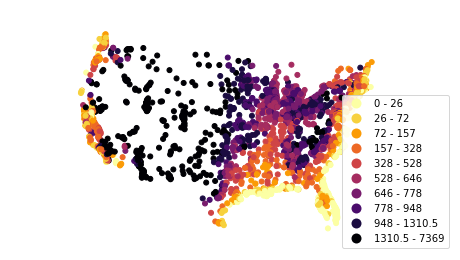

In [20]:
scheme = mc.Quantiles(continental_usa_cities["ELEV_IN_FT"], k=10)
gplt.pointplot(
  continental_usa_cities,
  projection=gcrs.AlbersEqualArea(),
  hue="ELEV_IN_FT",
  scheme=scheme,
  cmap="inferno_r",
  legend=True
)

Text(0.5, 1.0, 'Primary Schools in Greater Melbourne, 2018')

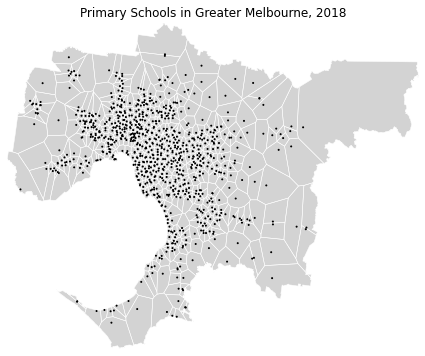

In [21]:
import warnings
warnings.filterwarnings("ignore", "GeoSeries.isna", UserWarning)
melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))
df = gpd.read_file(gplt.datasets.get_path("melbourne_schools"))
melbourne_primary_schools = df.query('School_Type == "Primary"')

ax = gplt.voronoi(
  melbourne_primary_schools,
  clip=melbourne,
  linewidth=0.5,
  edgecolor="white",
  projection=gcrs.Mercator()
)

gplt.polyplot(
  melbourne,
  edgecolor="None",
  facecolor="lightgray",
  ax=ax
)

gplt.pointplot(
  melbourne_primary_schools,
  color="black",
  ax=ax,
  s=1,
  extent=melbourne.total_bounds
)

plt.title("Primary Schools in Greater Melbourne, 2018")

<GeoAxesSubplot:>

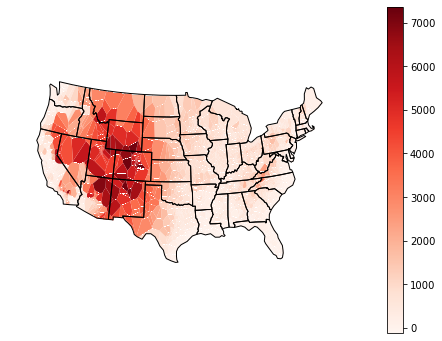

In [22]:
proj = gplt.crs.AlbersEqualArea(
  central_longitude=-98,
  central_latitude=39.5
)

ax = gplt.voronoi(
  continental_usa_cities,
  hue="ELEV_IN_FT",
  clip=contiguous_usa,
  projection=proj,
  cmap="Reds",
  legend=True,
  edgecolor="white",
  linewidth=0.01
)

gplt.polyplot(
  contiguous_usa,
  ax=ax,
  extent=contiguous_usa.total_bounds,
  edgecolor="black",
  linewidth=1,
  zorder=1
)